# Airline Passenger Satisfaction

**This dataset contains customer satisfaction scores from 120,000+ airline passengers, including additional information about each passenger, their flight, and type of travel, as well as ther evaluation of different factors like cleanliness, comfort, service, and overall experience.**

| Field                                      | Description |
|--------------------------------------------|-------------|
| ID                                         | Unique passenger identifier |
| Gender                                     | Gender of the passenger (Female/Male) |
| Age                                        | Age of the passenger |
| Customer Type                              | Type of airline customer (First-time/Returning) |
| Type of Travel                             | Purpose of the flight (Business/Personal) |
| Class                                      | Travel class in the airplane for the passenger seat |
| Flight Distance                            | Flight distance in miles |
| Departure Delay                            | Flight departure delay in minutes |
| Arrival Delay                              | Flight arrival delay in minutes |
| Departure and Arrival Time Convenience     | Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| Ease of Online Booking                     | Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| Check-in Service                           | Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| Online Boarding                            | Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| Gate Location                              | Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| On-board Service                           | Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| Seat Comfort                               | Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| Leg Room Service                           | Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| Cleanliness                                | Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| Food and Drink                             | Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| In-flight Service                          | Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| In-flight Wifi Service                     | Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| In-flight Entertainment                    | Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| Baggage Handling                           | Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) - 0 means "not applicable" |
| Satisfaction                               | Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied) |

**Type of Problem**: Classification.

**Source: https://mavenanalytics.io/data-playground?order=date_added%2Cdesc&search=airline**

# Imports

In [45]:
import random
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from random import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [46]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)
seaborn_palettes = ["Set1", "Set2", "Set3", "pastel", "dark", "viridis", "magma", "coolwarm", "tab10"]

# Data Preprocessing and Cleaning

In [47]:
df = pd.read_csv('C:/Users/harig/Downloads/Data Mining and Machine Learning/Final_DM/Data/airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.00,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.00,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.00,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.00,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.00,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [48]:
print(f"Dimenisons of the dataset: {df.shape}\n")
print(f"Dataset information\n--------------------------------------\n")
print(df.info())
print("\n--------------------------------------\n")
df.describe()

Dimenisons of the dataset: (129880, 24)

Dataset information
--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.00,129880.00,129880.00,129880.00,129487.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00
mean,64940.50,39.43,1190.32,14.71,15.09,3.06,2.76,3.31,3.25,2.98,3.38,3.44,3.35,3.29,3.20,3.64,2.73,3.36,3.63
std,37493.27,15.12,997.45,38.07,38.47,1.53,1.40,1.27,1.35,1.28,1.29,1.32,1.32,1.31,1.33,1.18,1.33,1.33,1.18
min,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,32470.75,27.00,414.00,0.00,0.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00
50%,64940.50,40.00,844.00,0.00,0.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,4.00
75%,97410.25,51.00,1744.00,12.00,13.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00
max,129880.00,85.00,4983.00,1592.00,1584.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [49]:
df.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.00,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.00,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.00,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.00,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.00,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [50]:
df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [51]:
numeric_cols = df.columns[(df.dtypes == int)|(df.dtypes==float)]
print("These are the numeric columns in the dataset:")
numeric_cols

These are the numeric columns in the dataset:


Index(['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

In [52]:
categorical_cols = df.columns[(df.dtypes != int) & (df.dtypes != float)]
print("These are the categorical columns")
categorical_cols

These are the categorical columns


Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')

***Handling missing values in the dataset.***

In [53]:
cols_to_check = numeric_cols.difference(['Departure Delay', 'Arrival Delay'])
zero_cols_list = df[cols_to_check].eq(0).any().loc[lambda x: x].index.tolist()
zero_cols_list

['Check-in Service',
 'Cleanliness',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Food and Drink',
 'Gate Location',
 'In-flight Entertainment',
 'In-flight Service',
 'In-flight Wifi Service',
 'Leg Room Service',
 'On-board Service',
 'Online Boarding',
 'Seat Comfort']

In [54]:
zCounts = (df[zero_cols_list]==0).sum()
zCounts

Check-in Service                             1
Cleanliness                                 14
Departure and Arrival Time Convenience    6681
Ease of Online Booking                    5682
Food and Drink                             132
Gate Location                                1
In-flight Entertainment                     18
In-flight Service                            5
In-flight Wifi Service                    3916
Leg Room Service                           598
On-board Service                             5
Online Boarding                           3080
Seat Comfort                                 1
dtype: int64

In [55]:
df[zero_cols_list] = df[zero_cols_list].replace(0,np.nan)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.00,3.00,3.00,4.00,3.00,3.00,3.00,5.00,2.00,5.00,5.00,5.00,3.00,5.00,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.00,2.00,2.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00,3.00,5.00,2.00,5.00,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.00,4.00,4.00,4.00,5.00,4.00,3.00,5.00,3.00,5.00,5.00,3.00,4.00,3.00,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.00,2.00,2.00,3.00,4.00,2.00,5.00,5.00,5.00,4.00,4.00,5.00,2.00,5.00,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.00,3.00,3.00,3.00,5.00,3.00,3.00,4.00,4.00,5.00,4.00,3.00,3.00,3.00,3,Satisfied


In [56]:
df.isna().sum()

ID                                           0
Gender                                       0
Age                                          0
Customer Type                                0
Type of Travel                               0
Class                                        0
Flight Distance                              0
Departure Delay                              0
Arrival Delay                              393
Departure and Arrival Time Convenience    6681
Ease of Online Booking                    5682
Check-in Service                             1
Online Boarding                           3080
Gate Location                                1
On-board Service                             5
Seat Comfort                                 1
Leg Room Service                           598
Cleanliness                                 14
Food and Drink                             132
In-flight Service                            5
In-flight Wifi Service                    3916
In-flight Ent

In [57]:
for x in zCounts:
    print(x)

1
14
6681
5682
132
1
18
5
3916
598
5
3080
1


In [58]:
for col, count in zip(zero_cols_list, zCounts):
    total_rows = len(df[col])
    percentage = (count / total_rows) * 100
    print(f"Percentage of missing values in column: {col} is {percentage:.2f}%")

Percentage of missing values in column: Check-in Service is 0.00%
Percentage of missing values in column: Cleanliness is 0.01%
Percentage of missing values in column: Departure and Arrival Time Convenience is 5.14%
Percentage of missing values in column: Ease of Online Booking is 4.37%
Percentage of missing values in column: Food and Drink is 0.10%
Percentage of missing values in column: Gate Location is 0.00%
Percentage of missing values in column: In-flight Entertainment is 0.01%
Percentage of missing values in column: In-flight Service is 0.00%
Percentage of missing values in column: In-flight Wifi Service is 3.02%
Percentage of missing values in column: Leg Room Service is 0.46%
Percentage of missing values in column: On-board Service is 0.00%
Percentage of missing values in column: Online Boarding is 2.37%
Percentage of missing values in column: Seat Comfort is 0.00%


In [59]:
# Imputing mising values using mean, (Sample size : Large)
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
df[zero_cols_list] = imputer.fit_transform(df[zero_cols_list])
print("Missing values replaced with mean.")

Missing values replaced with mean.


In [60]:
df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [61]:
df['Arrival Delay'].isna().sum()

np.int64(393)

In [62]:
df['Arrival Delay'].fillna(df['Arrival Delay'].mean(),inplace=True)
df['Arrival Delay'].isna().sum()

C:\Users\harig\AppData\Local\Temp\ipykernel_21332\4159964359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay'].fillna(df['Arrival Delay'].mean(),inplace=True)


np.int64(0)

# Exploratory Data Analysis

***Visualiztions***

C:\Users\harig\AppData\Local\Temp\ipykernel_21332\1709058456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Satisfaction', data=df, palette='Set2')


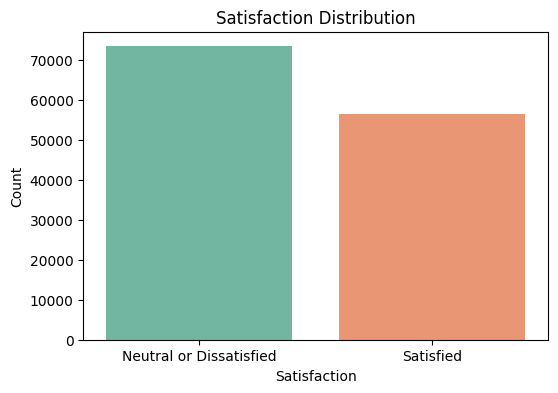

In [63]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Satisfaction', data=df, palette='Set2')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

In [64]:
numeric_cols

Index(['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

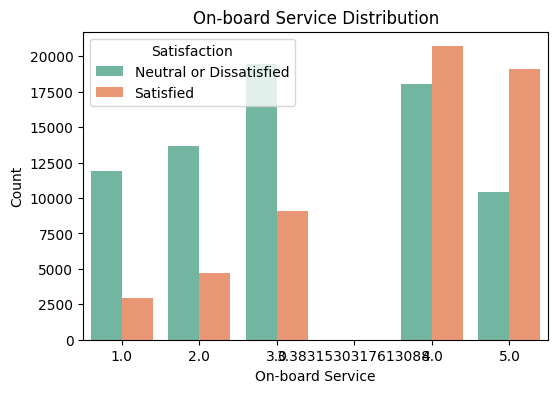

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(x='On-board Service', data=df, palette='Set2', hue='Satisfaction')
plt.title('On-board Service Distribution')
plt.xlabel('On-board Service')
plt.ylabel('Count')
plt.show()

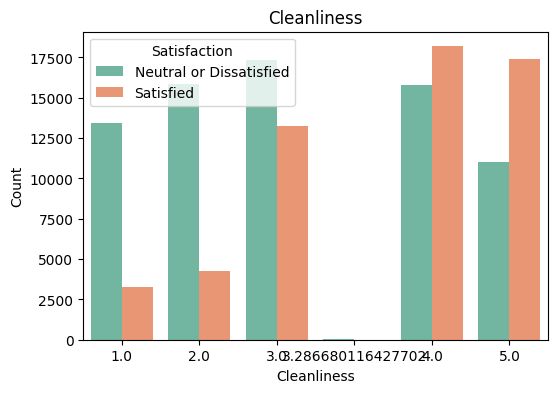

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cleanliness', data=df, palette='Set2', hue='Satisfaction')
plt.title('Cleanliness')
plt.xlabel('Cleanliness')
plt.ylabel('Count')
plt.show()

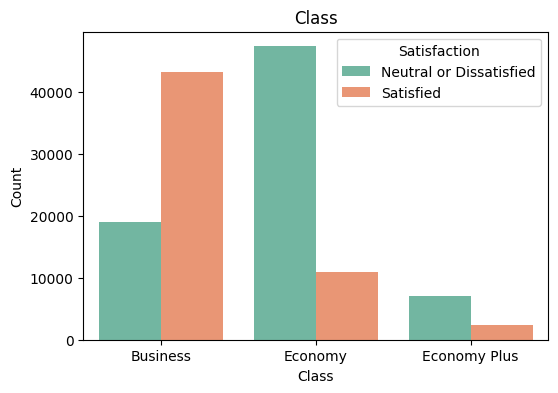

In [67]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2', hue='Satisfaction')
plt.title('Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

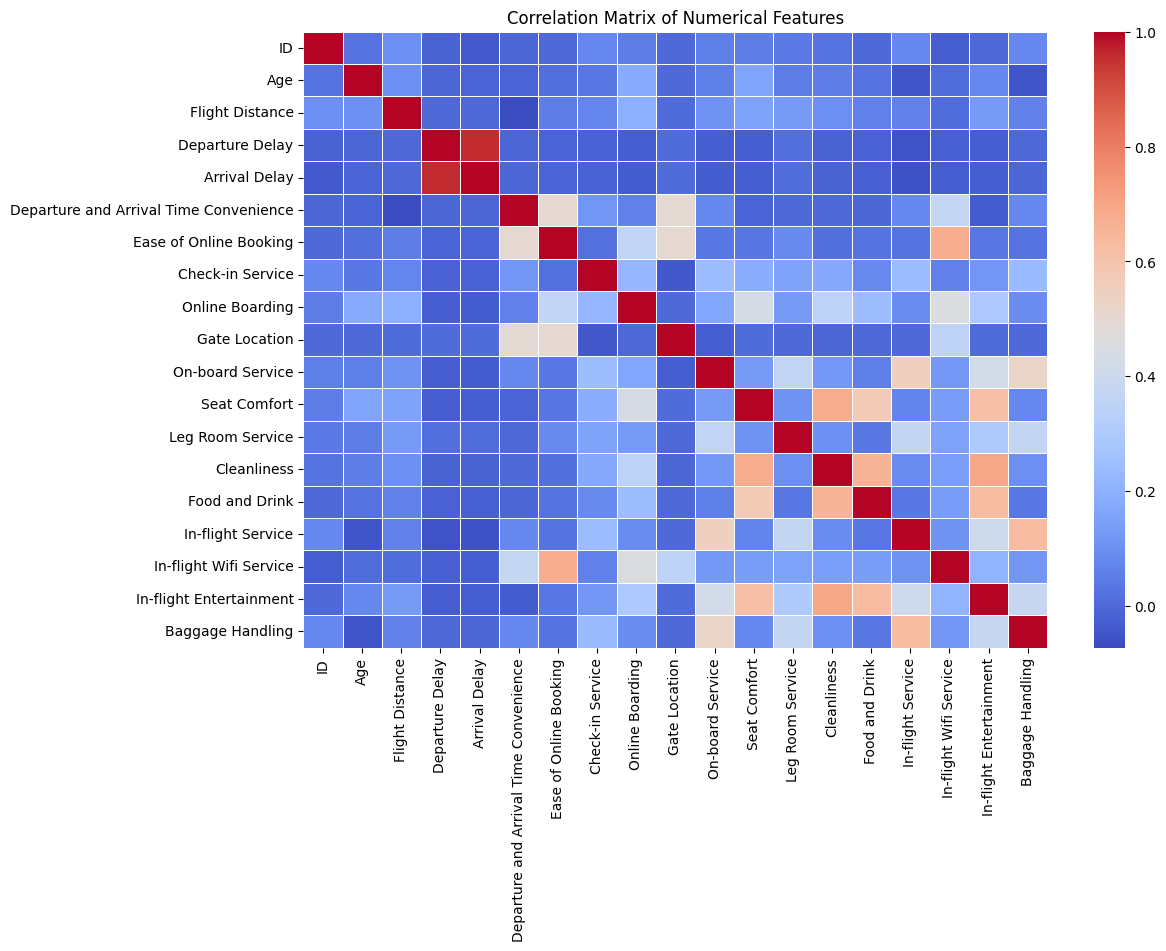

In [68]:
plt.figure(figsize=(12, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

***Encoding categorical columns in the dataset***

In [69]:
print(categorical_cols)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')


In [70]:
df['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

In [71]:
df = pd.get_dummies(df,columns=['Gender','Customer Type','Type of Travel'])

In [72]:
travel_class = {'Economy':0,'Economy Plus':1,'Business':2}
df['Class'] = df['Class'].map(travel_class)
df['Satisfaction'] = df['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})


In [73]:
print("Variable encoding complete.")
df.head()

Variable encoding complete.


,ID,Age,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal
0,1,48,2,821,2,5.00,3.00,3.00,4.00,3.00,3.00,3.00,5.00,2.00,5.00,5.00,5.00,3.00,5.00,5,0,False,True,True,False,True,False
1,2,35,2,821,26,39.00,2.00,2.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00,3.00,5.00,2.00,5.00,5,1,True,False,False,True,True,False
2,3,41,2,853,0,0.00,4.00,4.00,4.00,5.00,4.00,3.00,5.00,3.00,5.00,5.00,3.00,4.00,3.00,3,1,False,True,False,True,True,False
3,4,50,2,1905,0,0.00,2.00,2.00,3.00,4.00,2.00,5.00,5.00,5.00,4.00,4.00,5.00,2.00,5.00,5,1,False,True,False,True,True,False
4,5,49,2,3470,0,1.00,3.00,3.00,3.00,5.00,3.00,3.00,4.00,4.00,5.00,4.00,3.00,3.00,3.00,3,1,True,False,False,True,True,False


***Feature Engineering***

In [74]:
df.drop(columns=['ID'],inplace=True)

In [75]:
df['Total Delay'] = df['Departure Delay'] + df['Arrival Delay']
df.head()

,Age,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Total Delay
0,48,2,821,2,5.00,3.00,3.00,4.00,3.00,3.00,3.00,5.00,2.00,5.00,5.00,5.00,3.00,5.00,5,0,False,True,True,False,True,False,7.00
1,35,2,821,26,39.00,2.00,2.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00,3.00,5.00,2.00,5.00,5,1,True,False,False,True,True,False,65.00
2,41,2,853,0,0.00,4.00,4.00,4.00,5.00,4.00,3.00,5.00,3.00,5.00,5.00,3.00,4.00,3.00,3,1,False,True,False,True,True,False,0.00
3,50,2,1905,0,0.00,2.00,2.00,3.00,4.00,2.00,5.00,5.00,5.00,4.00,4.00,5.00,2.00,5.00,5,1,False,True,False,True,True,False,0.00
4,49,2,3470,0,1.00,3.00,3.00,3.00,5.00,3.00,3.00,4.00,4.00,5.00,4.00,3.00,3.00,3.00,3,1,True,False,False,True,True,False,1.00


***Data Transformation***

In [76]:
scaler = MinMaxScaler()
df['Flight Distance'] = scaler.fit_transform(df[['Flight Distance']])
df.head()

,Age,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Total Delay
0,48,2,0.16,2,5.00,3.00,3.00,4.00,3.00,3.00,3.00,5.00,2.00,5.00,5.00,5.00,3.00,5.00,5,0,False,True,True,False,True,False,7.00
1,35,2,0.16,26,39.00,2.00,2.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00,3.00,5.00,2.00,5.00,5,1,True,False,False,True,True,False,65.00
2,41,2,0.17,0,0.00,4.00,4.00,4.00,5.00,4.00,3.00,5.00,3.00,5.00,5.00,3.00,4.00,3.00,3,1,False,True,False,True,True,False,0.00
3,50,2,0.38,0,0.00,2.00,2.00,3.00,4.00,2.00,5.00,5.00,5.00,4.00,4.00,5.00,2.00,5.00,5,1,False,True,False,True,True,False,0.00
4,49,2,0.69,0,1.00,3.00,3.00,3.00,5.00,3.00,3.00,4.00,4.00,5.00,4.00,3.00,3.00,3.00,3,1,True,False,False,True,True,False,1.00


# Models

***Random Forest Classifier***

In [77]:
X = df.drop(columns=['Satisfaction'],axis=1)
y = df['Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [79]:
y_pred = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

In [80]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[21649   461]
 [ 1039 15815]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22110
           1       0.97      0.94      0.95     16854

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



***ROC AUC Curve***

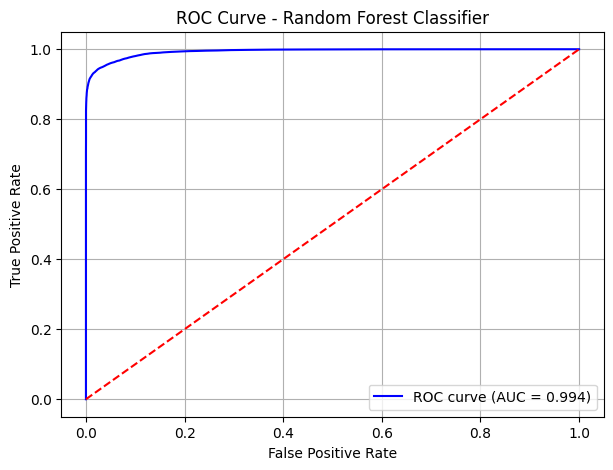

In [81]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(7, 5))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'ROC curve (AUC = {rf_auc:.3f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

***Cross Validation***

In [82]:
rf_cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean Accuracy:", rf_cv_scores.mean())

Random Forest Cross-Validation Scores: [0.95145719 0.93122088 0.95873982 0.96041416 0.96099955]
Random Forest Mean Accuracy: 0.952566320043276


In [83]:
feature_importances = model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

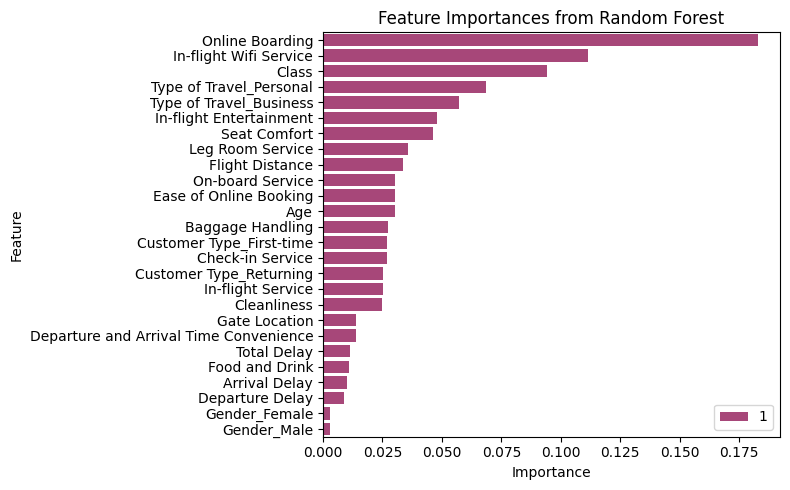

In [84]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=features_df, hue=x, palette='magma')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

***XGBosst Classifier***

In [85]:
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train,y_train)
xgY_pred = model.predict(X_test)
xgb_probs = model.predict_proba(X_test)[:, 1]

In [86]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9615029257776408
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     22110
           1       0.97      0.94      0.95     16854

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



***ROC AUC Curve***

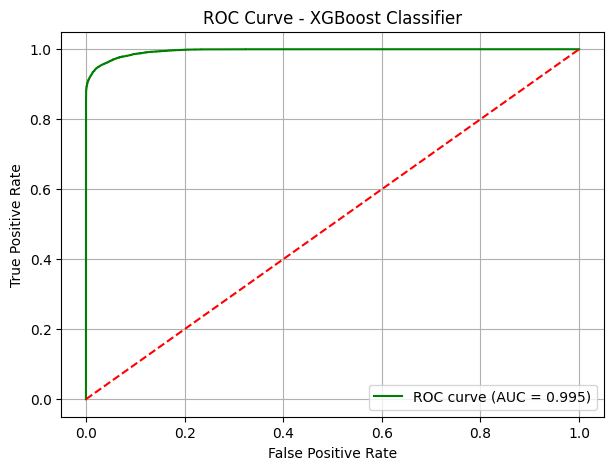

In [87]:
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)
plt.figure(figsize=(7, 5))
plt.plot(xgb_fpr, xgb_tpr, color='green', label=f'ROC curve (AUC = {xgb_auc:.3f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

***Cross Validation***

In [88]:
xg_cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("XGBoost Cross-Validation Scores:", xg_cv_scores)
print("XGBoost Forest Mean Accuracy:", xg_cv_scores.mean())

XGBoost Cross-Validation Scores: [0.95289806 0.93427078 0.96138066 0.962841   0.96323333]
XGBoost Forest Mean Accuracy: 0.954924765648881


In [89]:
feature_importances = model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

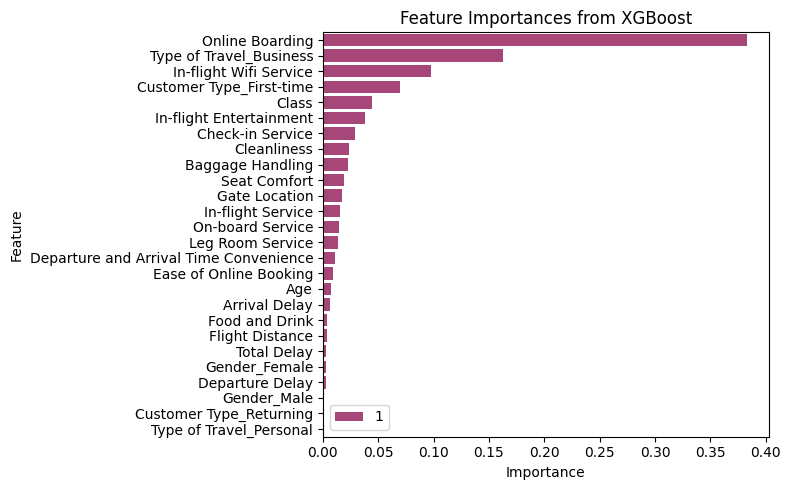

In [90]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=features_df, hue=x, palette='magma')
plt.title('Feature Importances from XGBoost')
plt.tight_layout()
plt.show()